## Import 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns

## Code

In [2]:

class MNISTHandler:
    def __init__(self):
        """
        Initialize the MNISTHandler class.

        Parameters : None

        Return : None
            
        """
        self.load_data()

    def load_data(self):
        """
        Load the MNIST dataset from OpenML and split it into training and testing sets.

        Parameters : None

        Return : None - This method modifies the instance variables directly, storing the train and test datasets.

        """
        mnist = fetch_openml('mnist_784', version=1)
        self.images, self.labels = mnist['data'].to_numpy(), mnist['target'].to_numpy().astype(int)
        self.images = self.images.reshape(-1, 28, 28)
        self.train_images, self.test_images, self.train_labels, self.test_labels = train_test_split(
            self.images, self.labels, test_size=0.2, random_state=42)

    def display_statistics(self):
        """
        Display the statistics of the MNIST dataset.

        Parameters : None

        Return : None

        """
        
        train_distribution = np.bincount(self.train_labels)
        test_distribution = np.bincount(self.test_labels)
        
        plt.figure(figsize=(12, 5))
        plt.subplot(1, 2, 1)
        plt.bar(range(10), train_distribution)
        plt.title('Train Set Digit Distribution')
        plt.xlabel('Digit')
        plt.ylabel('Count')
        
        plt.subplot(1, 2, 2)
        plt.bar(range(10), test_distribution)
        plt.title('Test Set Digit Distribution')
        plt.xlabel('Digit')
        plt.ylabel('Count')
        
        plt.show()

    def display_image(self, dataset='train', index=0):
        """
        Display an image from the dataset.

        Parameters : 
        dataset (str) : The dataset to display the image from. Can be 'train' or 'test'.
        index (int) : The index of the image to display.

        Return : None

        """
        if dataset == 'train':
            image = self.train_images[index]
            label = self.train_labels[index]
        else:
            image = self.test_images[index]
            label = self.test_labels[index]

        plt.imshow(image, cmap='gray')
        plt.title(f'Digit: {label}')
        plt.show()

    def mean_images(self):
        """
        Display the mean image of each digit.

        Parameters : None

        Return : None

        """
    
        mean_images = []
        for i in range(10):
            mean_images.append(np.mean(self.train_images[self.train_labels == i], axis=0))
        
        fig, axs = plt.subplots(2, 5, figsize=(10, 5))
        for i, ax in enumerate(axs.flat):
            ax.imshow(mean_images[i], cmap='gray')
            ax.set_title(f'Digit: {i}')
            ax.axis('off')
        
        plt.show()

    def reshape_images(self):
        """
        Reshape the images to be 1D arrays.

        Parameters : None

        Return : None

        """
        self.train_images_reshaped = self.train_images.reshape(-1, 28*28)
        self.test_images_reshaped = self.test_images.reshape(-1, 28*28)

    def train_knn(self, n_neighbors=3):
        """
        Train a K-Nearest Neighbors classifier on the dataset.

        Parameters :
        n_neighbors (int) : The number of neighbors to consider.

        Return : None
            
        """
        self.knn = KNeighborsClassifier(n_neighbors=n_neighbors)
        self.knn.fit(self.train_images_reshaped, self.train_labels)
        self.predictions = self.knn.predict(self.test_images_reshaped)
        accuracy = accuracy_score(self.test_labels, self.predictions)
        print(f'Accuracy: {accuracy}')
        
        cm = confusion_matrix(self.test_labels, self.predictions)
        plt.figure(figsize=(10, 7))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.title('Confusion Matrix')
        plt.show()
        
        print(classification_report(self.test_labels, self.predictions))

    def train_svm(self, kernel='linear', C=1.0, subset_size=10000, use_pca=True, n_components=50):
        """
        Train a Support Vector Machine (SVM) classifier on the dataset.

        Parameters:
        kernel (str): Specifies the kernel type to be used in the algorithm.
        C (float): Regularization parameter.
        subset_size (int): The size of the subset to use for training.
        use_pca (bool): Whether to use PCA for dimensionality reduction.
        n_components (int): Number of components for PCA.

        Return: None
        """
        # Use a subset of the data for training
        train_subset_images = self.train_images_reshaped[:subset_size]
        train_subset_labels = self.train_labels[:subset_size]
        
        if use_pca:
            # Apply PCA
            pca = PCA(n_components=n_components)
            train_subset_images = pca.fit_transform(train_subset_images)
            test_images = pca.transform(self.test_images_reshaped)
        else:
            test_images = self.test_images_reshaped

        self.svm = SVC(kernel=kernel, C=C)

        try:
            self.svm.fit(train_subset_images, train_subset_labels)
            self.predictions = self.svm.predict(test_images)
            accuracy = accuracy_score(self.test_labels, self.predictions)
            print(f'Accuracy: {accuracy:.2f}')

            cm = confusion_matrix(self.test_labels, self.predictions)

            plt.figure(figsize=(10, 7))
            sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
            plt.xlabel('Predicted')
            plt.ylabel('True')
            plt.title('Confusion Matrix')
            plt.show()

            print(classification_report(self.test_labels, self.predictions))

        except Exception as e:
            print(f"An error occurred during training: {e}")

    def train_mlp(self, hidden_layer_sizes=(100,), max_iter=300):
        """
        Train a Multilayer Perceptron (MLP) classifier on the dataset.

        Parameters:
        hidden_layer_sizes (tuple): The ith element represents the number of neurons in the ith hidden layer.
        max_iter (int): Maximum number of iterations. The solver iterates until convergence or this number of iterations.

        Return: None
        """
        # Normalize the data
        scaler = StandardScaler()
        train_images = scaler.fit_transform(self.train_images_reshaped)
        test_images = scaler.transform(self.test_images_reshaped)

        self.mlp = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, max_iter=max_iter)

        try:
            self.mlp.fit(train_images, self.train_labels)
            self.predictions = self.mlp.predict(test_images)
            accuracy = accuracy_score(self.test_labels, self.predictions)
            print(f'Accuracy: {accuracy:.2f}')

            cm = confusion_matrix(self.test_labels, self.predictions)

            plt.figure(figsize=(10, 7))
            sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
            plt.xlabel('Predicted')
            plt.ylabel('True')
            plt.title('Confusion Matrix')
            plt.show()

            print(classification_report(self.test_labels, self.predictions))

        except Exception as e:
            print(f"An error occurred during training: {e}")



In [3]:
mnist_handler = MNISTHandler()

## Result

Digit: This represents the different digits in the MNIST (from 0 to 9) dataset. 

Count: This represents the number of occurrences of each digit in the dataset.


Digit '0' appears 5923 times in the training set.

Digit '1' appears 6742 times in the training set.

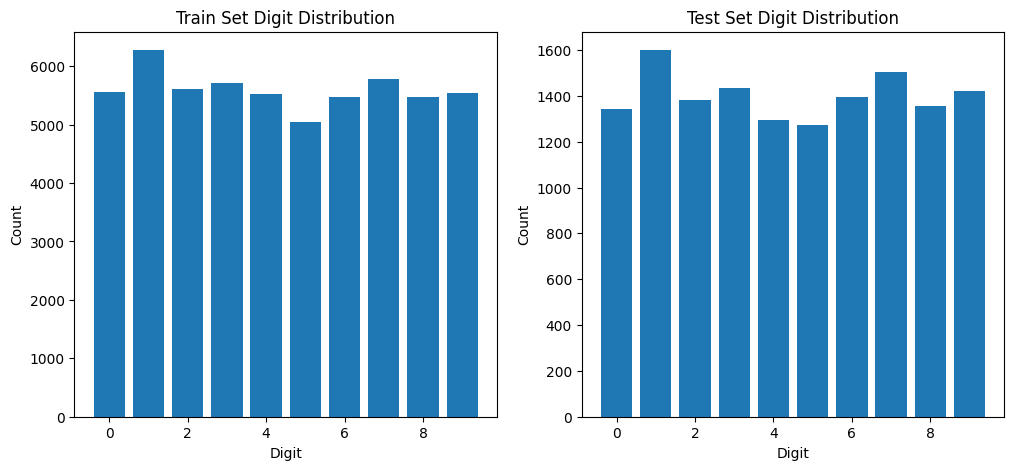

In [4]:
# Uncomment the following lines to test the implementation
mnist_handler.display_statistics()

Affiche une image du jeu de données MNIST en utilisant Matplotlib.

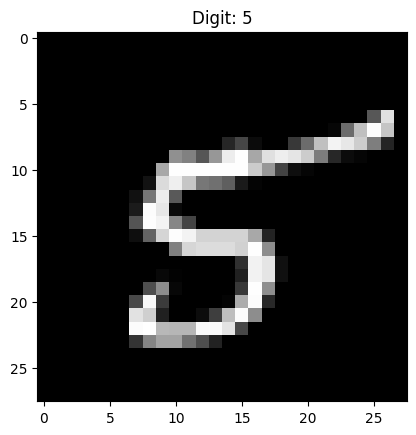

In [5]:
mnist_handler.display_image(dataset='train', index=190)

Calcule l'image moyenne pour chaque catégorie de chiffres dans l'ensemble d'entraînement.


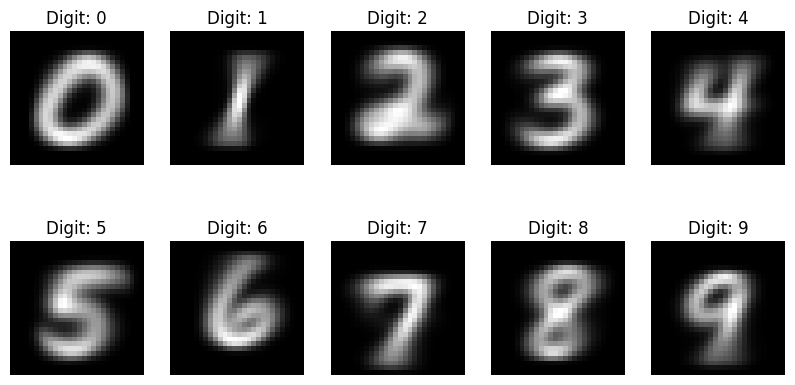

In [6]:
mnist_handler.mean_images()

Redimensionne les images dans les ensembles de données d'entraînement et de test à une nouvelle forme.

La méthode 'reshape_images' de l'objet 'mnist_handler' est appelée pour transformer la forme des images MNIST.

Ceci est généralement nécessaire pour adapter les images aux exigences d'entrée d'un modèle de réseau de neurones,

comme ajuster la dimension des images pour qu'elles correspondent à l'entrée attendue du modèle.

In [7]:
mnist_handler.reshape_images()

Calcul de l'exactitude (accuracy) du modèle. 

'accuracy_score' est utilisé pour comparer les étiquettes réelles de l'ensemble de test ('self.test_labels') 

avec les prédictions faites par le modèle ('self.predictions'). 

Le résultat est stocké dans la variable 'accuracy'.

Entraîne un modèle K-Nearest Neighbors (KNN) sur les données d'entraînement.

Accuracy: 0.9712857142857143


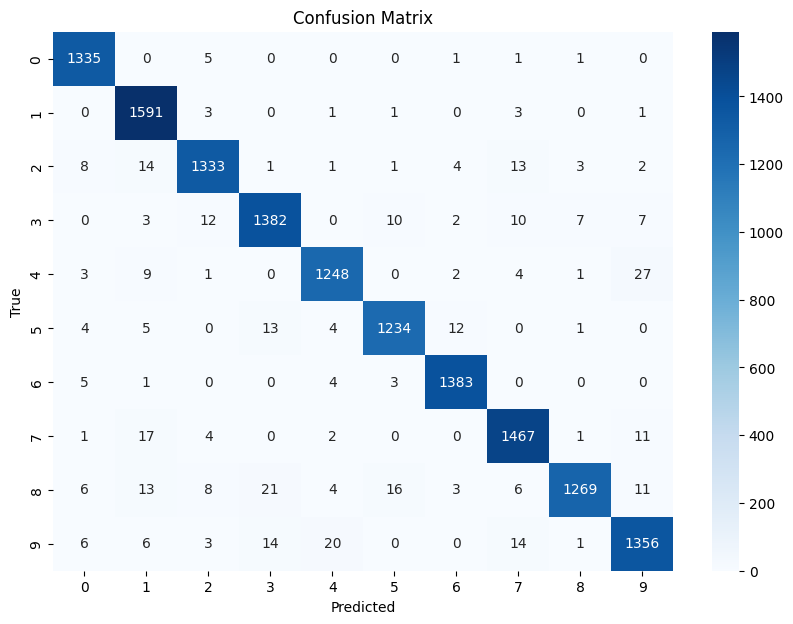

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1343
           1       0.96      0.99      0.98      1600
           2       0.97      0.97      0.97      1380
           3       0.97      0.96      0.97      1433
           4       0.97      0.96      0.97      1295
           5       0.98      0.97      0.97      1273
           6       0.98      0.99      0.99      1396
           7       0.97      0.98      0.97      1503
           8       0.99      0.94      0.96      1357
           9       0.96      0.95      0.96      1420

    accuracy                           0.97     14000
   macro avg       0.97      0.97      0.97     14000
weighted avg       0.97      0.97      0.97     14000



In [8]:
mnist_handler.train_knn()

In [9]:
mnist_handler.train_svm(kernel='rbf', subset_size=5000)

NameError: name 'PCA' is not defined

Accuracy: 0.97


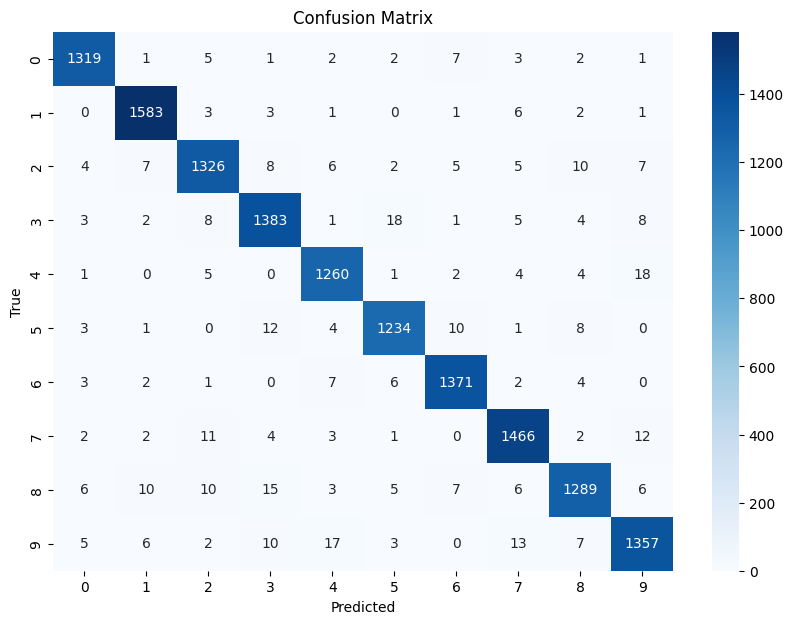

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1343
           1       0.98      0.99      0.99      1600
           2       0.97      0.96      0.96      1380
           3       0.96      0.97      0.96      1433
           4       0.97      0.97      0.97      1295
           5       0.97      0.97      0.97      1273
           6       0.98      0.98      0.98      1396
           7       0.97      0.98      0.97      1503
           8       0.97      0.95      0.96      1357
           9       0.96      0.96      0.96      1420

    accuracy                           0.97     14000
   macro avg       0.97      0.97      0.97     14000
weighted avg       0.97      0.97      0.97     14000



In [ ]:
mnist_handler.train_mlp(hidden_layer_sizes=(50, 50), max_iter=200)

Affichage d'un rapport de classification détaillé.

La fonction 'classification_report' est utilisée pour générer un rapport comprenant les principales métriques de classification telles que la précision, le rappel, le score F1, et le support pour chaque classe.

Les arguments 'self.test_labels' et 'self.predictions' représentent respectivement les étiquettes réelles et les prédictions du modèle.

Ce rapport est utile pour évaluer la performance du modèle de manière détaillée et comprendre comment il performe pour chaque classe.

Sparsity with L1 penalty: 31.19%
Test score with L1 penalty: 0.8844


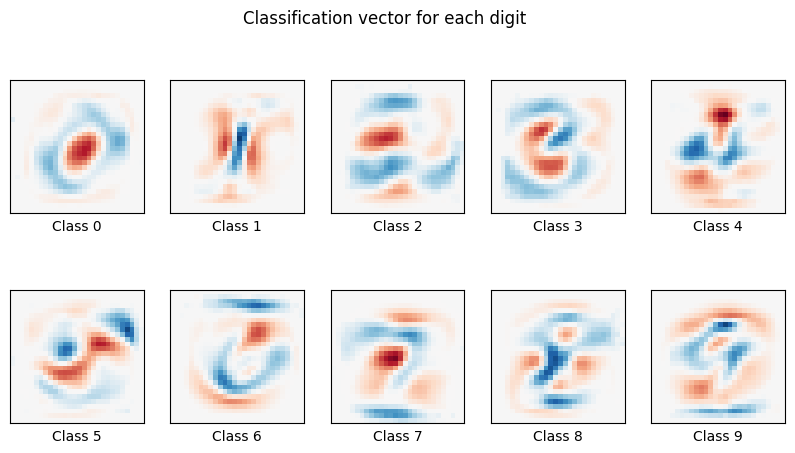

Logistic Regression example run in 7.769 s


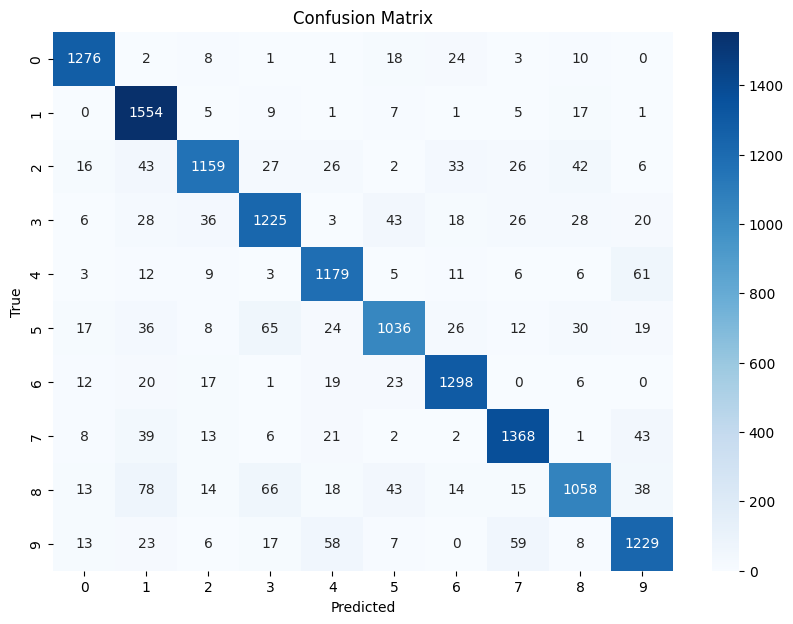

              precision    recall  f1-score   support

           0       0.94      0.95      0.94      1343
           1       0.85      0.97      0.90      1600
           2       0.91      0.84      0.87      1380
           3       0.86      0.85      0.86      1433
           4       0.87      0.91      0.89      1295
           5       0.87      0.81      0.84      1273
           6       0.91      0.93      0.92      1396
           7       0.90      0.91      0.91      1503
           8       0.88      0.78      0.83      1357
           9       0.87      0.87      0.87      1420

    accuracy                           0.88     14000
   macro avg       0.89      0.88      0.88     14000
weighted avg       0.88      0.88      0.88     14000



In [ ]:

class MNISTHandler:
    def __init__(self, train_samples=5000, test_samples=10000):
        self.train_samples = train_samples  
        self.test_samples = test_samples  
        self.load_data()  

    def load_data(self):
        
        mnist = fetch_openml('mnist_784', version=1)
        self.images, self.labels = mnist['data'].to_numpy(), mnist['target'].astype(int)
        self.images = self.images.reshape(-1, 28, 28)  # Reshape to 28x28 images
        self.train_images, self.test_images, self.train_labels, self.test_labels = train_test_split(
            self.images, self.labels, test_size=0.2, random_state=42)
        
        self.train_images_flattened = self.train_images.reshape(-1, 28*28)
        self.test_images_flattened = self.test_images.reshape(-1, 28*28)
        
        scaler = StandardScaler()
        self.train_images_flattened = scaler.fit_transform(self.train_images_flattened)
        self.test_images_flattened = scaler.transform(self.test_images_flattened)

    def display_statistics(self):
       
        train_distribution = np.bincount(self.train_labels)
        test_distribution = np.bincount(self.test_labels)
        
        plt.figure(figsize=(12, 5))
        plt.subplot(1, 2, 1)
        plt.bar(range(10), train_distribution)
        plt.title('Train Set Digit Distribution')
        plt.xlabel('Digit')
        plt.ylabel('Count')
        
        plt.subplot(1, 2, 2)
        plt.bar(range(10), test_distribution)
        plt.title('Test Set Digit Distribution')
        plt.xlabel('Digit')
        plt.ylabel('Count')
        
        plt.show()

    def display_image(self, dataset='train', index=0):
       
        if dataset == 'train':
            image = self.train_images[index]
            label = self.train_labels[index]
        else:
            image = self.test_images[index]
            label = self.test_labels[index]

        print(image.shape)
        plt.imshow(image, cmap='gray')
        plt.title(f'Digit: {label}')
        plt.show()

    def mean_images(self):
       
        mean_images = []
        for i in range(10):
            mean_images.append(np.mean(self.train_images[self.train_labels == i], axis=0))
        
        fig, axs = plt.subplots(2, 5, figsize=(10, 5))
        for i, ax in enumerate(axs.flat):
            ax.imshow(mean_images[i], cmap='gray')
            ax.set_title(f'Digit: {i}')
            ax.axis('off')
        
        plt.show()

    def train_knn(self, n_neighbors=3):
       
        self.knn = KNeighborsClassifier(n_neighbors=n_neighbors)
        self.knn.fit(self.train_images_flattened, self.train_labels)
        self.predictions = self.knn.predict(self.test_images_flattened)
        accuracy = accuracy_score(self.test_labels, self.predictions)
        print(f'Accuracy: {accuracy}')
        
        cm = confusion_matrix(self.test_labels, self.predictions)
        plt.figure(figsize=(10, 7))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.title('Confusion Matrix')
        plt.show()
        
        print(classification_report(self.test_labels, self.predictions))

    def train_logistic_regression(self, C=50.0):
        
        self.clf = LogisticRegression(C=C / self.train_samples, penalty="l1", solver="saga", tol=0.1)
        self.clf.fit(self.train_images_flattened, self.train_labels)
        self.sparsity = np.mean(self.clf.coef_ == 0) * 100
        self.score = self.clf.score(self.test_images_flattened, self.test_labels)
        print("Sparsity with L1 penalty: %.2f%%" % self.sparsity)
        print("Test score with L1 penalty: %.4f" % self.score)
    
    def plot_logistic_regression_coefficients(self):
       
        coef = self.clf.coef_.copy()
        plt.figure(figsize=(10, 5))
        scale = np.abs(coef).max()
        for i in range(10):
            l1_plot = plt.subplot(2, 5, i + 1)
            l1_plot.imshow(
                coef[i].reshape(28, 28),
                interpolation="nearest",
                cmap=plt.cm.RdBu,
                vmin=-scale,
                vmax=scale,
            )
            l1_plot.set_xticks(())
            l1_plot.set_yticks(())
            l1_plot.set_xlabel("Class %i" % i)
        plt.suptitle("Classification vector for each digit")
        plt.show()

    def run(self):
        
        t0 = time.time()
        self.train_logistic_regression()
        self.plot_logistic_regression_coefficients()
        self.predictions = self.clf.predict(self.test_images_flattened)
        run_time = time.time() - t0
        print("Logistic Regression example run in %.3f s" % run_time)
        cm = confusion_matrix(self.test_labels, self.predictions)
        plt.figure(figsize=(10, 7))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.title('Confusion Matrix')
        plt.show()
        
        print(classification_report(self.test_labels, self.predictions))

# Instantiate and test the implementation
mnist_handler = MNISTHandler()
mnist_handler.run()  # Run the Logistic Regression process
# mnist_handler.display_statistics()
# mnist_handler.display_image(dataset='train', index=0)
# mnist_handler.mean_images()
# mnist_handler.train_knn()




